# CPSC 222 DA5 - Programming

[Gonzaga University](https://www.gonzaga.edu/)

Jonathan Smoley

October 30, 2021

I attempted the bonus!

## Imported Libraries
A *utils.py* file was used to store libraries and functions used in this notebook. However, I did  
implement the `importlib` trick so this utils file is newly loaded each time the cell is run.

In [118]:
import importlib
import utils

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\jtsmo\\OneDrive - Gonzaga University\\Fall 2021\\CPSC222\\DA5\\utils.py'>

## Load the Data
For this assignment, data needs to be read in from a `.csv` file into a DataFrame object  
using the `pandas` library. The attributes in the dataset are as follows:  
* ID: an integer that acts as the index of the DataFrame starting with `0`
* Gender: a string that has possible values of `M` or `F` within the scope of the dataset
* Age: an integer for the age of each patient in years
* Marital Status: a string that holds the relationship status
* RIC: an integer representing each patient's RIC in the  
[Centers for Medicaid and Medicare Services IRF-PAI training manual](https://www.cms.gov/medicare/medicare-fee-for-service-payment/inpatientrehabfacpps/downloads/irfpai-manual-2012.pdf)
* Admission Total FIM Score: (FIM stands for Functional Independence Measure) an  
integer representing the starting FIM for each patient
* Discharge Total FIM Score: an integer representing the ending FIM for each patient

In [119]:
file_name = "patient_data_to_clean.csv"

patient_data_df = utils.read_patient_data(file_name)

## Clean the Data
The **ID**, **Gender**, **Age**, and **both FIM Score columns** do not appear to be in need of cleaning.

However, the **Marital Status columns** has some weird encoding due to the *write-in* nature  
of the recording system. This data needs to meet coding system so the following rule list  
will be implemented within the DataFrame:
* Never Married
* Divorced
* Married
* Widowed
* Separated

Also, the integer-based **RIC column** holds integer values that refer to an `integer-string`  
*dictionary* of RIC labels. Therefore, the string values should replace the integer keys  
to make the data entries more understandable. This dictionary is shown below:
1. "Stroke"
1. "TBI" (Traumatic brain injury)
1. "NTBI" (Non-traumatic brain injury)
1. "TSCI" (Traumatic spinal cord injury)
1. "NTSCI" (Non-traumatic spinal cord injury)
1. "Neuro" (Neurologic conditions)
1. "FracLE" (Fracture, lower extremity)
1. "ReplLE" (Joint replacement, lower extremity)
1. "Ortho" (Other orthopaedic)
1. "AMPLE" (Amputation, lower extremity)
1. "AMP-NLE"(Amputation, upper extremity or other)
1. "OsteoA" (Osteoarthritis)
1. "RheumA" (Rheumatoid arthritis)
1. "Cardiac" (Cardiac disorders)
1. "Pulmonary" (Pulmonary disorders)
1. "Pain" (Pain syndromes)
1. "MMT-NBSCI" (Major multiple trauma, non brain injury or spinal cord injury)
1. "MMT-BSCI" (Major multiple trauma, brain injury or spinal cord injury)
1. "GB": (Guillain-Barre Syndrome)
1. "Misc" (Miscellaneous)
1. "Burns"

In [120]:
# possible marital states
status_options = ["Never Married", 
                  "Divorced", 
                  "Married",
                  "Widowed",
                  "Separated"]

clean_marital_df = utils.clean_marital(patient_data_df, status_options)

# dictionary to reference in the RIC replacement
ric_decoder = {1: "Stroke", 2: "TBI", 3: "NTBI", 
               4: "TSCI", 5: "NTSCI", 6: "Neuro", 
               7: "FracLE", 8: "ReplLE", 9: "Ortho", 
               10: "AMPLE", 11: "AMP-NLE", 12: "OsteoA", 
               13: "RheumA", 14: "Cardiac", 15: "Pulmonary", 
               16: "Pain", 17: "MMT-NBSCI", 18: "MMT-BSCI", 
               19: "GB", 20: "Misc", 21: "Burns"}

clean_df = utils.clean_RIC(clean_marital_df, ric_decoder)

utils.write_data(clean_df, "patient_data_cleaned.csv")

## Aggregate the Data and Compute Summary Statistics
So I now have a clean DataFrame that can be summarized using statistical computations.  
In the interest of organizing these statistics, each statistic will be added to a `pandas`  
*Series* object. Below are the statistics being computed:
1. `patients_total`: total number of patients
1. `males_total`: total number of males
1. `females_total`: total number of females
1. `married_total`: total number of married patients
1. `most_common_RIC`: RIC label for the most commonly occurring RIC
1. `most_common_RIC_total`: total number of patients with the most commonly occurring RIC
1. `stroke_age_avg`: average age for stroke patients
1. `stroke_age_std`: standard deviation of age for stroke patients
1. `stroke_age_male_avg`: average age for male stroke patients
1. `stroke_age_male_std`: standard deviation of age for male stroke patients
1. `stroke_age_female_avg`: average age for female stroke patients
1. `stroke_age_female_std`: standard deviation of age for female stroke patients

In [121]:
patients_total = utils.sum_patients(clean_df)

males_total, females_total = utils.compute_gender_totals(clean_df)

married_total = utils.count_married(clean_df)

most_common_ric, most_common_ric_total = utils.mc_ric_stats(clean_df)

stroke_ages_avg, stroke_ages_std = utils.general_stroke_stats(clean_df)

stroke_ages_male_avg, stroke_ages_male_std = utils.male_stroke_stats(clean_df)

stroke_ages_female_avg, stroke_ages_female_std = utils.female_stroke_stats(clean_df)

patient_stats_ser = utils.pd.Series([patients_total, males_total, females_total,
                                     married_total, most_common_ric, most_common_ric_total,
                                     stroke_ages_avg, stroke_ages_std, stroke_ages_male_avg,
                                     stroke_ages_male_std, stroke_ages_female_avg, 
                                     stroke_ages_female_std,], 
                                     ["Total Patients", "Total Males", "Total Females", 
                                     "Total Married", "Most Commmon RIC", "Most RIC Count",
                                     "Stroke Age Avg", "Stroke Age StdDev", "Male Stroke Age Avg", 
                                     "Male Stroke Age StdDev", "Female Stroke Age Avg", "Female Stroke Age StdDev"])

utils.output_stats(patient_stats_ser)


Total Patients                4555
Total Males                   2242
Total Females                 2313
Total Married                 2263
Most Commmon RIC            Stroke
Most RIC Count                1169
Stroke Age Avg               71.29
Stroke Age StdDev            14.34
Male Stroke Age Avg          70.08
Male Stroke Age StdDev       13.84
Female Stroke Age Avg         72.6
Female Stroke Age StdDev     14.76
dtype: object


## Observations
After performing these calculations, some notable observations can be made:
1. About half of the patients are married.
1. The most common RIC type is a stroke.
1. The Average age for a stroke, regardless of gender, appears to be about 71.3.
1. Distinguishing between genders, Females in this dataset have a greater average  
age to have a stroke than Males.

## Visualize the Data
Now that I have a completed a statistical analysis of the patient data I can  
visualize it so it is more appealing to an audience. To do this, I will need  
the patient data *grouped by each RIC label*, the ages of those with that RIC,  
and the Average and Standard Deviation of that specific RIC type. Only after  
collecting this data, can I then use it to create a set of **Histograms** and  
**Scatterplots**. Lastly, I dropped RIC graphs that had less than 50 values  
for age given due to a lack of enough data to show an effective normal  
distribution.

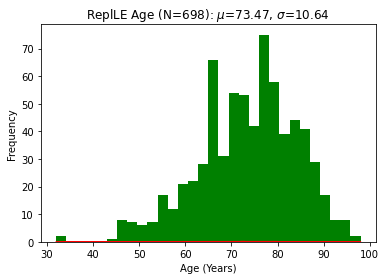

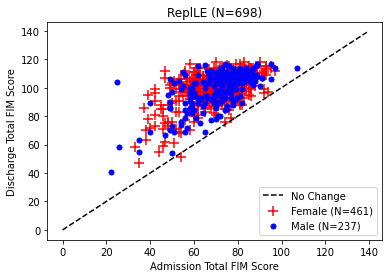

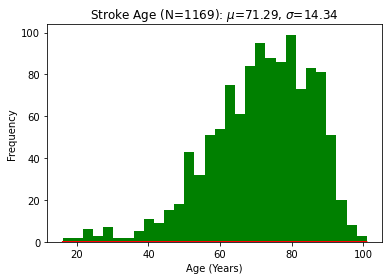

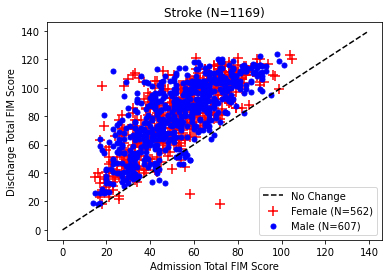

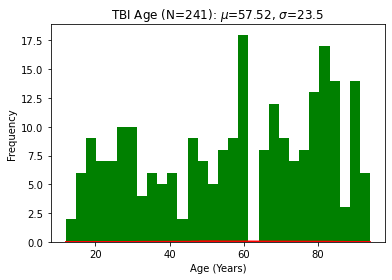

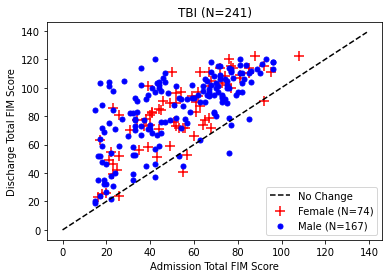

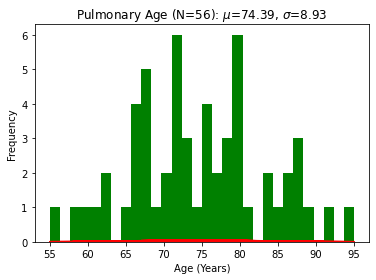

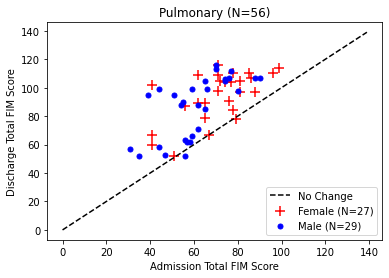

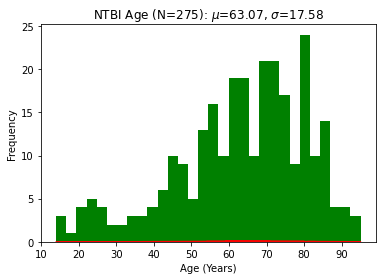

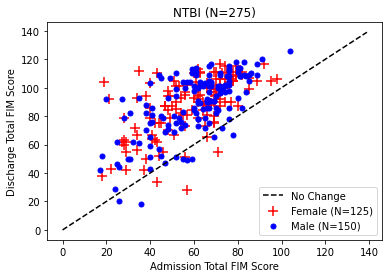

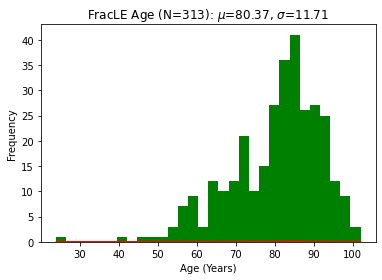

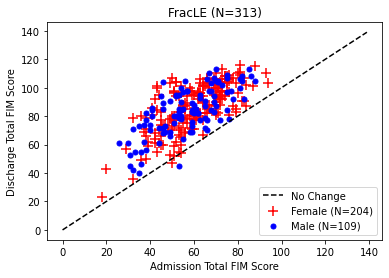

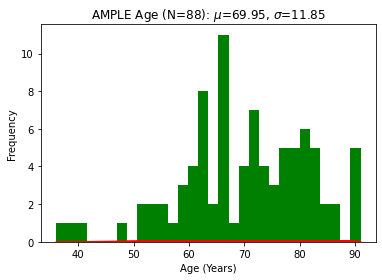

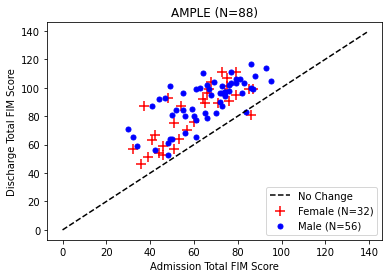

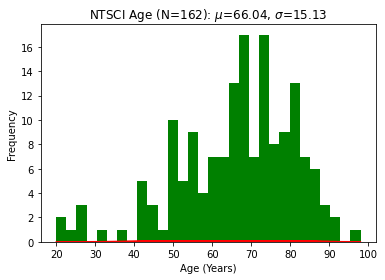

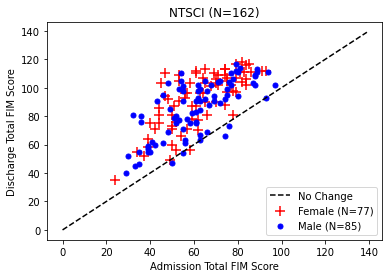

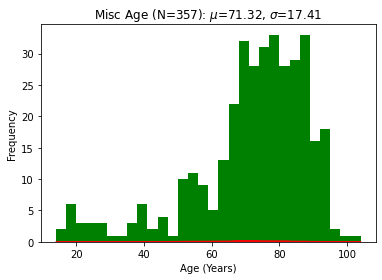

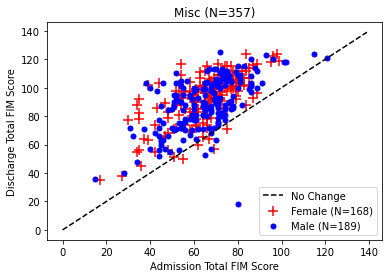

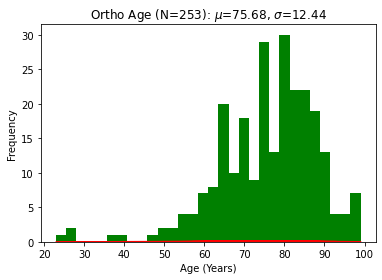

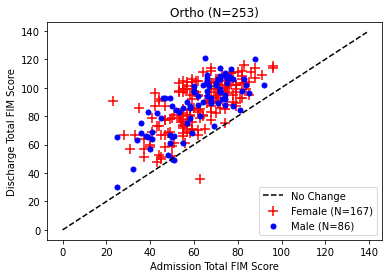

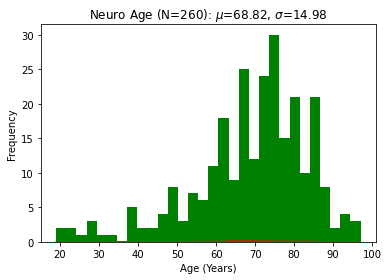

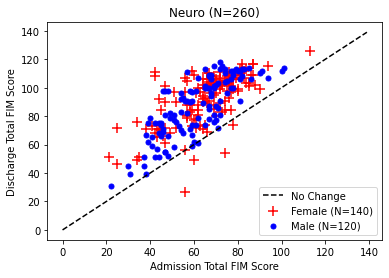

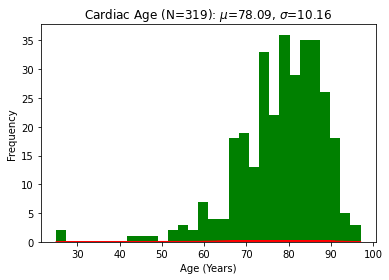

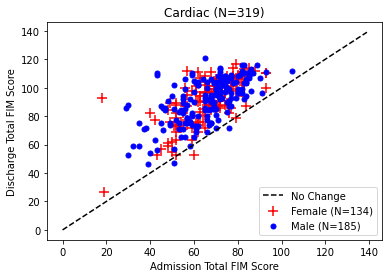

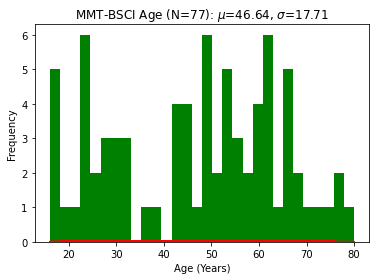

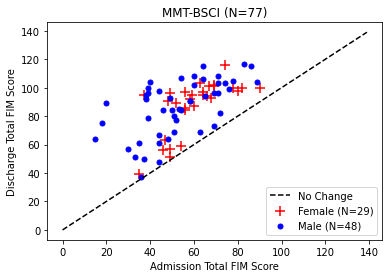

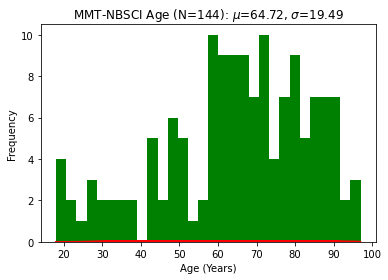

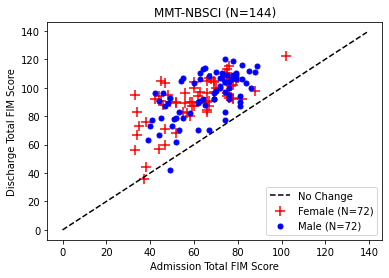

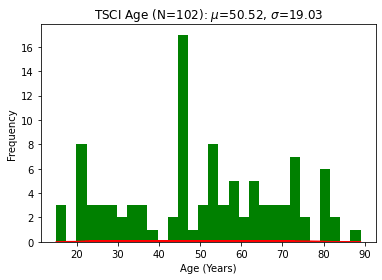

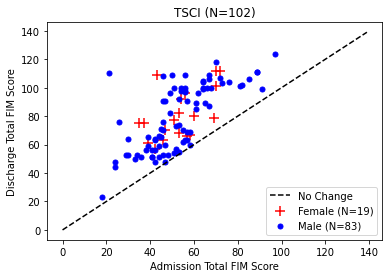

In [122]:
grouped_by_ric_df = clean_df.groupby('RIC', sort = False)

for key, item in grouped_by_ric_df:
    if len(item['Age']) >= 50:
        counts = item['Age'].value_counts()
        ric_count = counts.sum()

        mean_val, std_dev_val = utils.get_age_data(item)

        utils.plot_hist(key, item, ric_count, mean_val, std_dev_val)

        male_admit_scores, male_dis_scores, male_counts = utils.get_male_scores(item)

        female_admit_scores, female_dis_scores, female_counts = utils.get_female_scores(item)

        utils.plot_scatter(key, female_admit_scores, female_dis_scores, male_admit_scores, male_dis_scores, ric_count, female_counts, male_counts)

## Observations
First off, it appears as though most participants experienced little to no  
change in their RIC states. This is shown in the scatter plots for each RIC  
type. Also, with the help of the histograms it can be said that most who  
experience RIC states are anywhere from their early 60's to their late 80's.